In [1]:
import numpy as np
import pandas as pd
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns

from pyfrechet.metric_spaces import MetricData, Euclidean, two_euclidean
from pyfrechet.regression.bagged_regressor import BaggedRegressor
from sklearn.preprocessing import MinMaxScaler
import multiprocessing as mp
import matplotlib.lines as mlines
import sys
import time

In [2]:
def pb_radius_results():
    """ Compute empirical OOB_quantile for different confidence levels. """
    coverage_df = pd.DataFrame(columns=['sample_index', 'radius'])
    i = 0
    for file in os.listdir(os.path.join(os.getcwd(), 'pb_volume_results')):
        if file.endswith('.npy'):
            i+=1
            infile=open(os.path.join(os.getcwd(), 'pb_volume_results/' + file), 'rb')
            result=np.load(infile, allow_pickle=True).item()
            infile.close()
        else:
            continue
        coverage_df = pd.concat([coverage_df, pd.DataFrame({
            'sample_index': int(file.split('_')[1][4:]),
            'radius': [result['radius']],
            'dim': file.split('_')[3],
            'N': int(file.split('_')[4][1:])  # Extract N parameter
        }, index=pd.RangeIndex(0, 1))], ignore_index=True)

    return coverage_df

def pb_vol_results():
    """ Compute empirical OOB_quantile for different confidence levels. """
    coverage_df = pd.DataFrame(columns=['sample_index', 'volume'])
    i = 0
    for file in os.listdir(os.path.join(os.getcwd(), 'pb_volume_results')):
        if file.endswith('.npy'):
            i+=1
            infile=open(os.path.join(os.getcwd(), 'pb_volume_results/' + file), 'rb')
            result=np.load(infile, allow_pickle=True).item()
            infile.close()
        else:
            continue
        coverage_df = pd.concat([coverage_df, pd.DataFrame({
            'sample_index': int(file.split('_')[1][4:]),
            'volume': [result['volume']],
            'dim': file.split('_')[3],
            'N': int(file.split('_')[4][1:])  # Extract N parameter
        }, index=pd.RangeIndex(0, 1))], ignore_index=True)

    return coverage_df

def pb_all_results():
    """ Compute empirical OOB_quantile for different confidence levels. """
    coverage_df = pd.DataFrame(columns=['sample_index', 'radius'])
    i = 0
    for file in os.listdir(os.path.join(os.getcwd(), 'pb_volume_results')):
        if file.endswith('.npy'):
            i+=1
            infile=open(os.path.join(os.getcwd(), 'pb_volume_results/' + file), 'rb')
            result=np.load(infile, allow_pickle=True).item()
            infile.close()
        else:
            continue
        coverage_df = pd.concat([coverage_df, pd.DataFrame({
            'sample_index': int(file.split('_')[1][4:]),
            'radius': [result['radius']],
            'volume': [result['volume']],
            'dim': file.split('_')[3],
            'N': int(file.split('_')[4][1:])  # Extract N parameter
        }, index=pd.RangeIndex(0, 1))], ignore_index=True)

    return coverage_df

def conf_radius_results():
    """ Compute empirical OOB_quantile for different confidence levels. """
    coverage_df = pd.DataFrame(columns=['sample_index', 'radius'])
    i = 0
    for file in os.listdir(os.path.join(os.getcwd(), 'conf_volume_results')):
        if file.endswith('.npy'):
            i+=1
            infile=open(os.path.join(os.getcwd(), 'conf_volume_results/' + file), 'rb')
            result=np.load(infile, allow_pickle=True).item()
            infile.close()
        else:
            continue
        coverage_df = pd.concat([coverage_df, pd.DataFrame({
            'sample_index': int(file.split('_')[1][4:]),
            'radius': [result['radius']],
            'dim': file.split('_')[3],
            'N': int(file.split('_')[4][1:])  # Extract N parameter
        }, index=pd.RangeIndex(0, 1))], ignore_index=True)

    return coverage_df

def conf_vol_results():
    """ Compute empirical OOB_quantile for different confidence levels. """
    coverage_df = pd.DataFrame(columns=['sample_index', 'volume'])
    i = 0
    for file in os.listdir(os.path.join(os.getcwd(), 'conf_volume_results')):
        if file.endswith('.npy'):
            i+=1
            infile=open(os.path.join(os.getcwd(), 'conf_volume_results/' + file), 'rb')
            result=np.load(infile, allow_pickle=True).item()
            infile.close()
        else:
            continue
        coverage_df = pd.concat([coverage_df, pd.DataFrame({
            'sample_index': int(file.split('_')[1][4:]),
            'volume': [result['volume']],
            'dim': file.split('_')[3],
            'N': int(file.split('_')[4][1:])  # Extract N parameter
        }, index=pd.RangeIndex(0, 1))], ignore_index=True)

    return coverage_df

def conf_all_results():
    """ Compute empirical OOB_quantile for different confidence levels. """
    coverage_df = pd.DataFrame(columns=['sample_index', 'radius'])
    i = 0
    for file in os.listdir(os.path.join(os.getcwd(), 'conf_volume_results')):
        if file.endswith('.npy'):
            i+=1
            infile=open(os.path.join(os.getcwd(), 'conf_volume_results/' + file), 'rb')
            result=np.load(infile, allow_pickle=True).item()
            infile.close()
        else:
            continue
        coverage_df = pd.concat([coverage_df, pd.DataFrame({
            'sample_index': int(file.split('_')[1][4:]),
            'radius': [result['radius']],  
            'volume': [result['volume']],
            'dim': file.split('_')[3],
            'N': int(file.split('_')[4][1:])  # Extract N parameter
        }, index=pd.RangeIndex(0, 1))], ignore_index=True)

    return coverage_df


In [3]:
pb_radius_df = pb_radius_results()
pb_vol_df = pb_vol_results()

conf_radius_df = conf_radius_results()
conf_vol_df = conf_vol_results()

In [4]:
pb_radius_df_alpha_01 = pb_radius_df.copy()
pb_radius_df_alpha_05 = pb_radius_df.copy()
pb_radius_df_alpha_1 = pb_radius_df.copy()

pb_vol_df_alpha_01 = pb_vol_df.copy()
pb_vol_df_alpha_05 = pb_vol_df.copy()
pb_vol_df_alpha_1 = pb_vol_df.copy()

pb_radius_df_alpha_01['radius'] = pb_radius_df['radius'].apply(lambda x: x[0])
pb_radius_df_alpha_05['radius'] = pb_radius_df['radius'].apply(lambda x: x[1])
pb_radius_df_alpha_1['radius'] = pb_radius_df['radius'].apply(lambda x: x[2])

pb_vol_df_alpha_01['volume'] = pb_vol_df['volume'].apply(lambda x: x[0])
pb_vol_df_alpha_05['volume'] = pb_vol_df['volume'].apply(lambda x: x[1])
pb_vol_df_alpha_1['volume'] = pb_vol_df['volume'].apply(lambda x: x[2])

conf_radius_df_alpha_01 = conf_radius_df.copy()
conf_radius_df_alpha_05 = conf_radius_df.copy()
conf_radius_df_alpha_1 = conf_radius_df.copy()

conf_radius_df_alpha_01['radius'] = conf_radius_df['radius'].apply(lambda x: x[0])
conf_radius_df_alpha_05['radius'] = conf_radius_df['radius'].apply(lambda x: x[1])
conf_radius_df_alpha_1['radius'] = conf_radius_df['radius'].apply(lambda x: x[2])

conf_vol_df_alpha_01 = conf_vol_df.copy()
conf_vol_df_alpha_05 = conf_vol_df.copy()
conf_vol_df_alpha_1 = conf_vol_df.copy()

conf_vol_df_alpha_01['volume'] = conf_vol_df['volume'].apply(lambda x: x[0])
conf_vol_df_alpha_05['volume'] = conf_vol_df['volume'].apply(lambda x: x[1])
conf_vol_df_alpha_1['volume'] = conf_vol_df['volume'].apply(lambda x: x[2])

# Add alpha level labels for clarity
pb_radius_df_alpha_01['alpha'] = '0.01'
pb_radius_df_alpha_05['alpha'] = '0.05'
pb_radius_df_alpha_1['alpha'] = '0.1'

pb_vol_df_alpha_01['alpha'] = '0.01'
pb_vol_df_alpha_05['alpha'] = '0.05'
pb_vol_df_alpha_1['alpha'] = '0.1'

conf_radius_df_alpha_01['alpha'] = '0.01'
conf_radius_df_alpha_05['alpha'] = '0.05'
conf_radius_df_alpha_1['alpha'] = '0.1'

conf_vol_df_alpha_01['alpha'] = '0.01'
conf_vol_df_alpha_05['alpha'] = '0.05'
conf_vol_df_alpha_1['alpha'] = '0.1'

conf_vol_df_alpha_01.head()
conf_vol_df_alpha_05.head()
conf_vol_df_alpha_1.head()

,sample_index,volume,dim,N,alpha
0,36,1.118402e+07,10,100.0,0.1
1,217,6.889832e+03,5,100.0,0.1
2,52,3.977687e+00,1,500.0,0.1
3,220,6.759361e+03,5,200.0,0.1
4,74,3.339576e+07,10,500.0,0.1


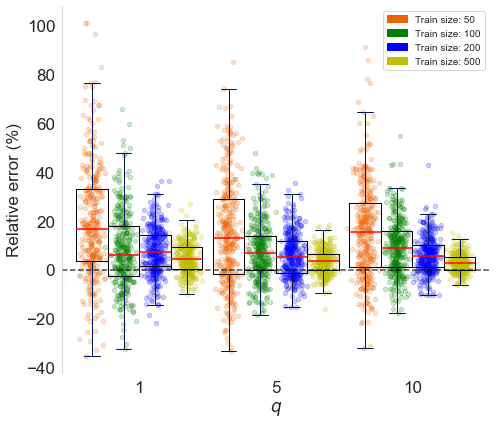

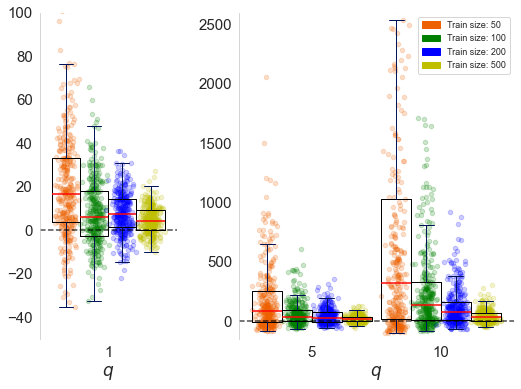

In [7]:
def ratio_compare_radius_dimension(save_path):
    """
    Plot the relative error of Split-Conformal to Prediction Ball radii across different dimensions and N values.
    Relative error = (SC_radius - PB_radius) / PB_radius * 100 for matched samples.
    """
    
    def compute_relative_error_data(pb_data, sc_data, metric='radius'):
        """Compute relative errors by matching sample_index, dim, and N"""
        error_data = []
        
        for _, pb_row in pb_data.iterrows():
            # Find matching SC row with same sample_index, dim, and N
            sc_match = sc_data[(sc_data['sample_index'] == pb_row['sample_index']) & 
                              (sc_data['dim'] == pb_row['dim']) &
                              (sc_data['N'] == pb_row['N'])]
            
            if not sc_match.empty:
                sc_value = sc_match[metric].iloc[0]
                pb_value = pb_row[metric]
                relative_error = ((sc_value - pb_value) / pb_value * 100) if pb_value != 0 else np.nan
                
                error_data.append({
                    'sample_index': pb_row['sample_index'],
                    'dim': pb_row['dim'],
                    'N': pb_row['N'],
                    'relative_error': relative_error
                })
        
        return pd.DataFrame(error_data)
    
    for pb_data, sc_data, alpha_level in zip(
        [pb_radius_df_alpha_1], 
        [conf_radius_df_alpha_1], 
        [0.1]
    ):
        # Compute relative error data
        error_df = compute_relative_error_data(pb_data, sc_data, metric='radius')

        ##### Set style options #####
        boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
        flierprops = dict(marker='o', markersize=1, linestyle='none')
        whiskerprops = dict(color='#00145A')
        capprops = dict(color='#00145A')
        medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

        # Extract unique dimensions and N values
        dims = sorted(error_df['dim'].astype(int).unique())
        n_values = sorted(error_df['N'].unique())
        n_values = [int(n) for n in n_values]  # Ensure N values are integer

        # Create single plot with all dimensions
        fig, ax = plt.subplots(1, 1, figsize=(7, 6))
        
        # Colors for different N values
        n_colors = ['#ee6100', 'g', 'b', 'y']
        
        # Calculate positions for boxplots
        box_width = 0.03
        positions = []
        dim_centers = []  # Track actual centers for x-ticks
        
        for d_idx, d in enumerate(dims):
            dim_center = d_idx * (len(n_values) * box_width + 0.01)  # Center position for this dimension
            dim_centers.append(dim_center)  # Store the actual center
            
            for n_idx, n_val in enumerate(n_values):
                pos = dim_center + (n_idx - len(n_values)/2 + 0.5) * box_width
                positions.append(pos)
                
                # Filter data for current dimension and N
                dim_n_data = error_df[(error_df['dim'].astype(int) == d) & (error_df['N'] == n_val)]
                error_values = dim_n_data['relative_error'].values
                
                # Create boxplot
                if len(error_values) > 0:
                    bp = ax.boxplot([error_values], positions=[pos], widths=box_width, notch=False,
                                   whiskerprops=whiskerprops, capprops=capprops, 
                                   flierprops=flierprops, medianprops=medianprops,
                                   showmeans=False, showfliers=False)
                    
                    # Scatter plot for individual points
                    xs = np.random.normal(pos, 0.005, len(error_values))
                    ax.scatter(xs, error_values, alpha=0.2, color=n_colors[n_idx], s=20)

        # Add horizontal line at 0 (equal performance)
        ax.axhline(y=0.0, color='black', linestyle='--', alpha=0.7, label='Equal performance')
        
        # Set x-axis labels for dimensions - use the stored dim_centers
        ax.set_xticks(dim_centers)
        ax.set_xticklabels([str(d) for d in dims], fontsize=17)
        
        # Create legend for N values
        legend_handles = [mpatches.Patch(color=n_colors[i], label=f'Train size: {n_val}') 
                         for i, n_val in enumerate(n_values)]
        ax.legend(handles=legend_handles, loc='upper right', fontsize=10)
        sns.set_style("whitegrid")

        sns.despine(ax=ax, bottom=True)  # Remove right and top axis lines

        # Set tight x-axis limits to reduce whitespace
        if positions:
            ax.set_xlim(min(positions) - box_width*0.95, max(positions) + box_width*0.95)

        ax.set_ylabel('Relative error (%)', fontsize=17)
        ax.set_xlabel(r'$q$', fontsize=17)
        ax.tick_params(labelsize=17)
        ax.grid(False)

        fig.tight_layout()
        filename = os.path.join(save_path, f'relative_error_sc_pb_radius_{str(alpha_level)[2:]}.png')
        fig.savefig(filename, bbox_inches='tight', format='png', transparent=True)
        plt.show()

def ratio_compare_volume_dimension(save_path):
    """
    Plot the relative error of Split-Conformal to Prediction Ball volumes across different dimensions and N values.
    Relative error = (SC_volume - PB_volume) / PB_volume * 100 for matched samples.
    Uses separate y-axis scales: dimension 1 on the left, dimensions 5 and 10 on the right.
    """
    
    def compute_relative_error_data(pb_data, sc_data, metric='volume'):
        """Compute relative errors by matching sample_index, dim, and N"""
        error_data = []
        
        for _, pb_row in pb_data.iterrows():
            # Find matching SC row with same sample_index, dim, and N
            sc_match = sc_data[(sc_data['sample_index'] == pb_row['sample_index']) & 
                              (sc_data['dim'] == pb_row['dim']) &
                              (sc_data['N'] == pb_row['N'])]
            
            if not sc_match.empty:
                sc_value = sc_match[metric].iloc[0]
                pb_value = pb_row[metric]
                relative_error = ((sc_value - pb_value) / pb_value * 100) if pb_value != 0 else np.nan
                
                error_data.append({
                    'sample_index': pb_row['sample_index'],
                    'dim': pb_row['dim'],
                    'N': pb_row['N'],
                    'relative_error': relative_error
                })
        
        return pd.DataFrame(error_data)
    
    for pb_data, sc_data, alpha_level in zip(
        [pb_vol_df_alpha_1], 
        [conf_vol_df_alpha_1], 
        [0.1]
    ):
        # Compute relative error data
        error_df = compute_relative_error_data(pb_data, sc_data, metric='volume')
        
        ##### Set style options #####
        boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
        flierprops = dict(marker='o', markersize=1, linestyle='none')
        whiskerprops = dict(color='#00145A')
        capprops = dict(color='#00145A')
        medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')
        
        # Extract unique dimensions and N values
        dims = sorted(error_df['dim'].astype(int).unique())
        n_values = sorted(error_df['N'].unique())
        n_values = [int(n) for n in n_values]

        # Create figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8.5, 6), 
                                       gridspec_kw={'width_ratios': [1, 2], 'wspace': 0.3})
        
        # Colors for different N values
        n_colors = ['#ee6100', 'g', 'b', 'y']
        
        # Calculate positions for boxplots
        box_width = 0.03
        
        # Separate dimensions: dim=1 for left plot, dims=[5,10] for right plot
        dim_1_data = error_df[error_df['dim'].astype(int) == 1]
        dim_high_data = error_df[error_df['dim'].astype(int).isin([5, 10])]
        
        # Left subplot: Dimension 1
        dim_center = 0
        left_positions = []
        for n_idx, n_val in enumerate(n_values):
            pos = dim_center + (n_idx - len(n_values)/2 + 0.5) * box_width
            left_positions.append(pos)
            
            # Filter data for dimension 1 and current N
            dim_n_data = dim_1_data[dim_1_data['N'] == n_val]
            error_values = dim_n_data['relative_error'].values
            
            # Create boxplot
            if len(error_values) > 0:
                bp = ax1.boxplot([error_values], positions=[pos], widths=box_width, notch=False,
                                whiskerprops=whiskerprops, capprops=capprops, 
                                flierprops=flierprops, medianprops=medianprops,
                                showmeans=False, showfliers=False)
            
            # Scatter plot for individual points
            xs = np.random.normal(pos, 0.005, len(error_values))
            ax1.scatter(xs, error_values, alpha=0.2, color=n_colors[n_idx], s=20)
        # Right subplot: Dimensions 5 and 10
        high_dims = [5, 10]
        right_positions = []
        dim_centers = []
        for d_idx, d in enumerate(high_dims):
            dim_center = d_idx * (len(n_values) * box_width + 0.01)
            dim_centers.append(dim_center)  # Store actual centers
            
            for n_idx, n_val in enumerate(n_values):
                pos = dim_center + (n_idx - len(n_values)/2 + 0.5) * box_width
                right_positions.append(pos)
                
                # Filter data for current dimension and N
                dim_n_data = dim_high_data[(dim_high_data['dim'].astype(int) == d) & (dim_high_data['N'] == n_val)]
                error_values = dim_n_data['relative_error'].values
                
                # Create boxplot
                if len(error_values) > 0:
                    bp = ax2.boxplot([error_values], positions=[pos], widths=box_width, notch=False,
                                   whiskerprops=whiskerprops, capprops=capprops, 
                                   flierprops=flierprops, medianprops=medianprops,
                                   showmeans=False, showfliers=False)
                    
                    # Scatter plot for individual points
                    xs = np.random.normal(pos, 0.005, len(error_values))
                    ax2.scatter(xs, error_values, alpha=0.2, color=n_colors[n_idx], s=20)
        
        # Add horizontal lines at 0 (equal performance)
        ax1.axhline(y=0.0, color='black', linestyle='--', alpha=0.7)
        ax2.axhline(y=0.0, color='black', linestyle='--', alpha=0.7)
        
        # Set x-axis labels - use actual centers
        ax1.set_xticks([0])  # Center for dimension 1
        ax1.set_xticklabels(['1'], fontsize=17)
        
        ax2.set_xticks(dim_centers)  # Use stored centers
        ax2.set_xticklabels([str(d) for d in high_dims], fontsize=17)
        
        # Create legend for N values (only on right subplot)
        legend_handles = [mpatches.Patch(color=n_colors[i], label=f'Train size: {n_val}') 
                         for i, n_val in enumerate(n_values)]
        ax2.legend(handles=legend_handles, loc='upper right', fontsize=9)
        
        # Style both subplots
        sns.despine(ax=ax1, bottom=True)
        sns.despine(ax=ax2, bottom=True)
        
        # Set tight x-axis limits to reduce whitespace
        if left_positions:
            ax1.set_xlim(min(left_positions) - box_width*0.95, max(left_positions) + box_width*0.95)
        if right_positions:
            ax2.set_xlim(min(right_positions) - box_width*0.95, max(right_positions) + box_width*0.95)
        
        # Set y-axis labels
        
        # Set x-axis labels
        ax1.set_xlabel(r'$q$', fontsize=17)
        ax2.set_xlabel(r'$q$', fontsize=17)
        
        # Set tick parameters
        ax1.tick_params(labelsize=15)
        ax2.tick_params(labelsize=15)
        
        # Turn off grids
        ax1.grid(False)
        ax2.grid(False)
        
        # Set different y-limits for each subplot based on the data ranges
        if alpha_level == 0.01:
            ax1.set_ylim(-50, 100)    # Adjust for dimension 1
            ax2.set_ylim(-100, 2000)  # Adjust for dimensions 5,10
        elif alpha_level == 0.05:
            ax1.set_ylim(-50, 100)    # Adjust for dimension 1
            ax2.set_ylim(-100, 2000)  # Adjust for dimensions 5,10
        else:  # alpha_level == 0.1
            ax1.set_ylim(-50, 100)    # Adjust for dimension 1
            ax2.set_ylim(-150, 2600)  # Adjust for dimensions 5,10
        
        filename = os.path.join(save_path, f'relative_error_sc_pb_volume_{str(alpha_level)[2:]}.png')
        fig.savefig(filename, bbox_inches='tight', format='png', dpi = 75, transparent=True)
        plt.show()


# Generate the ratio plots
save_path = os.path.join(os.getcwd())

# Generate plots for Radius ratios
ratio_compare_radius_dimension(save_path)

# Generate plots for volume ratios
ratio_compare_volume_dimension(save_path)

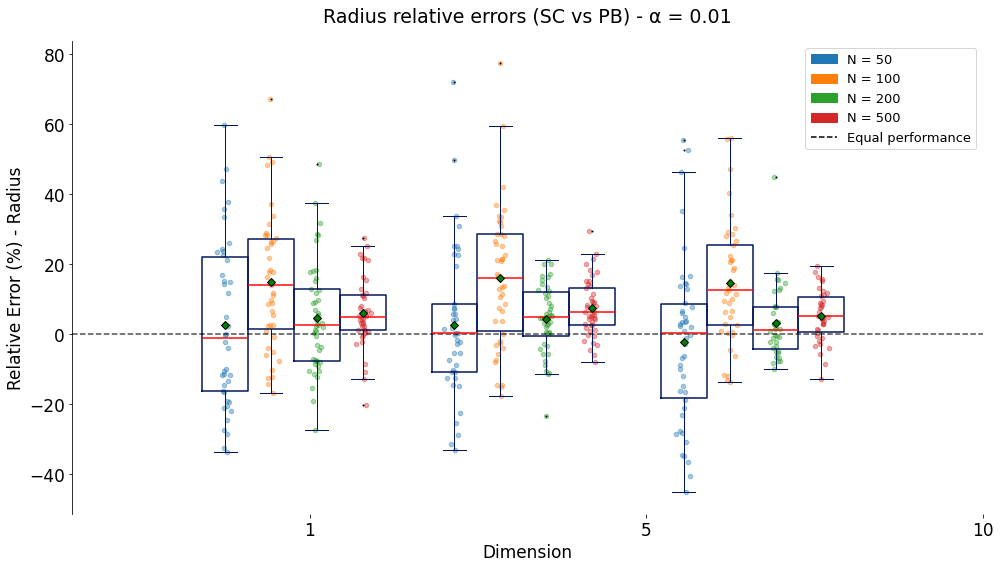

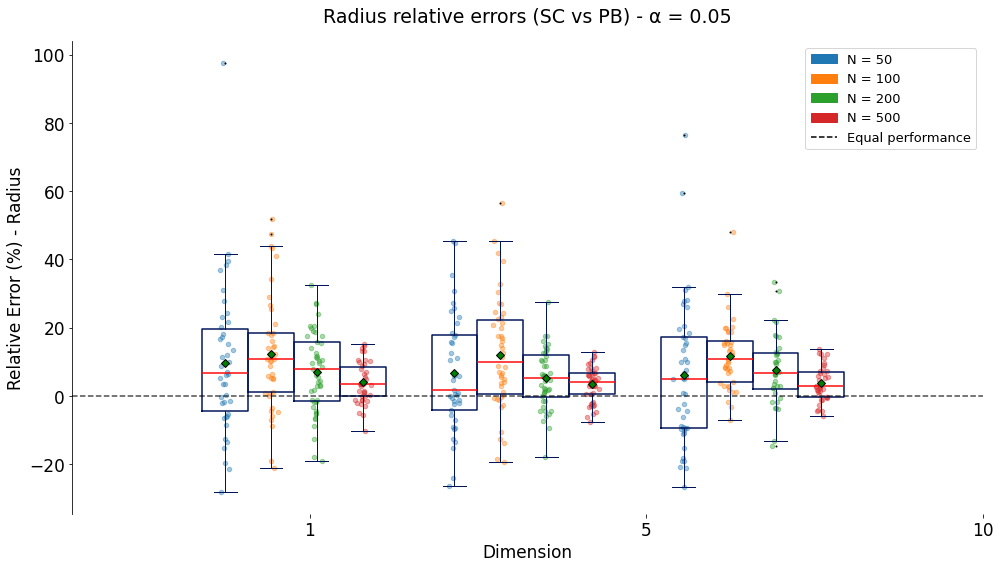

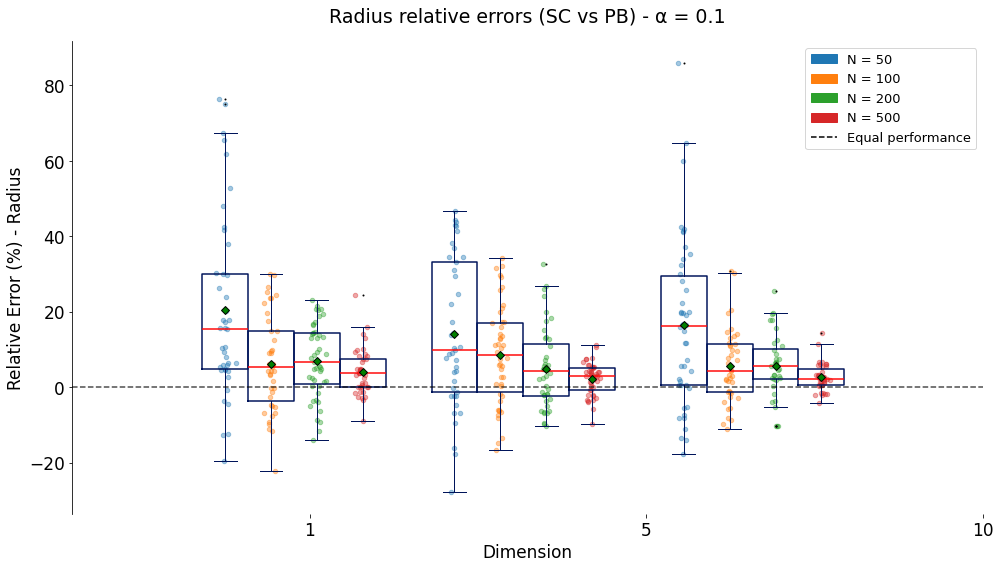

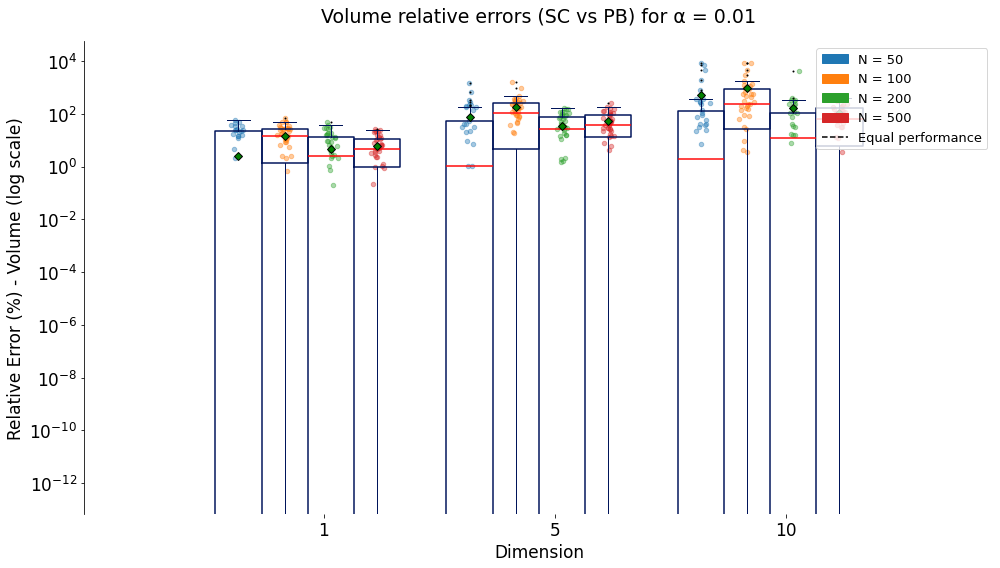

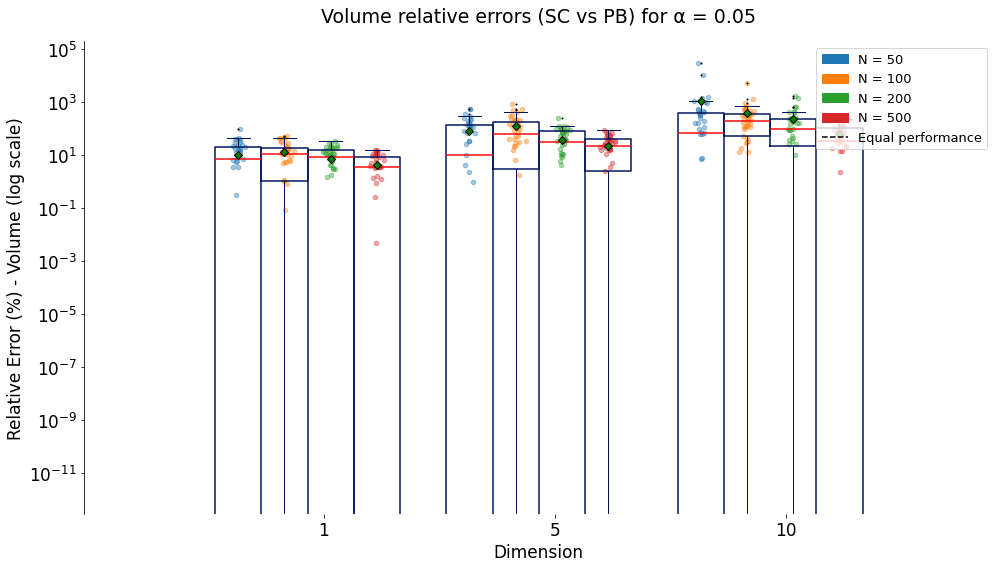

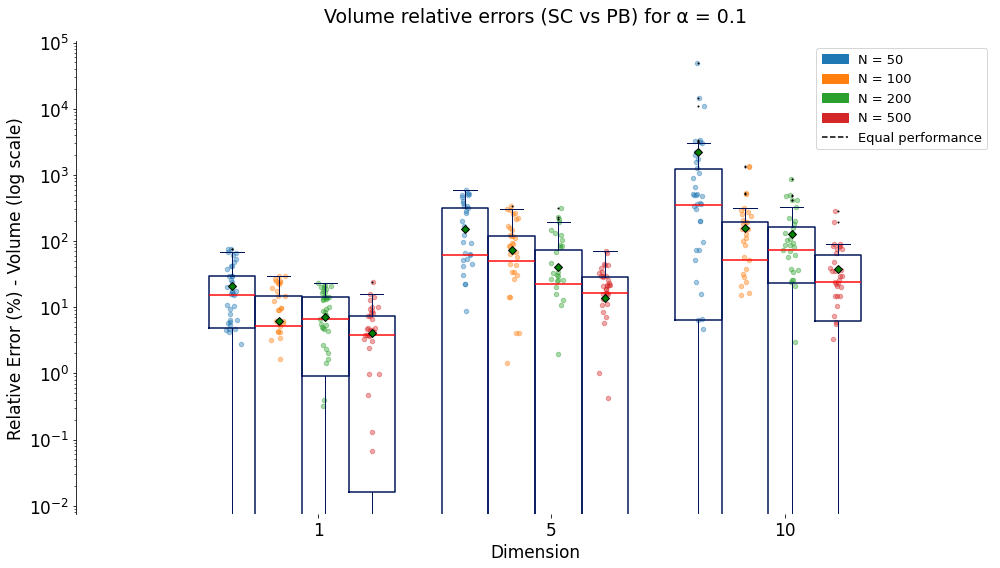

In [6]:
def ratio_compare_radius_dimension(save_path):
    """
    Plot the relative error of Split-Conformal to Prediction Ball radii across different dimensions and N values.
    Relative error = (SC_radius - PB_radius) / PB_radius * 100 for matched samples.
    """
    
    def compute_relative_error_data(pb_data, sc_data, metric='radius'):
        """Compute relative errors by matching sample_index, dim, and N"""
        error_data = []
        
        for _, pb_row in pb_data.iterrows():
            # Find matching SC row with same sample_index, dim, and N
            sc_match = sc_data[(sc_data['sample_index'] == pb_row['sample_index']) & 
                              (sc_data['dim'] == pb_row['dim']) &
                              (sc_data['N'] == pb_row['N'])]
            
            if not sc_match.empty:
                sc_value = sc_match[metric].iloc[0]
                pb_value = pb_row[metric]
                relative_error = ((sc_value - pb_value) / pb_value * 100) if pb_value != 0 else np.nan
                
                error_data.append({
                    'sample_index': pb_row['sample_index'],
                    'dim': pb_row['dim'],
                    'N': pb_row['N'],
                    'relative_error': relative_error
                })
        
        return pd.DataFrame(error_data)
    
    for pb_data, sc_data, alpha_level in zip(
        [pb_radius_df_alpha_01, pb_radius_df_alpha_05, pb_radius_df_alpha_1], 
        [conf_radius_df_alpha_01, conf_radius_df_alpha_05, conf_radius_df_alpha_1], 
        [0.01, 0.05, 0.1]
    ):
        # Compute relative error data
        error_df = compute_relative_error_data(pb_data, sc_data, metric='radius')
        
        ##### Set style options #####
        boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
        flierprops = dict(marker='o', markersize=1, linestyle='none')
        whiskerprops = dict(color='#00145A')
        capprops = dict(color='#00145A')
        medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

        # Extract unique dimensions and N values
        dims = sorted(error_df['dim'].astype(int).unique())
        n_values = sorted(error_df['N'].unique())
        n_values = [int(n) for n in n_values]  # Ensure N values are integer

        # Create single plot with all dimensions
        fig, ax = plt.subplots(1, 1, figsize=(14, 8))
        
        # Colors for different N values
        n_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
        
        # Calculate positions for boxplots
        # For each dimension, we'll have 4 boxplots (one for each N value)
        box_width = 0.15
        positions = []
        labels = []
        
        for d_idx, d in enumerate(dims):
            dim_center = d_idx * (len(n_values) * box_width + 0.15)  # Center position for this dimension
            for n_idx, n_val in enumerate(n_values):
                pos = dim_center + (n_idx - len(n_values)/2 + 0.15) * box_width
                positions.append(pos)
                
                # Filter data for current dimension and N
                dim_n_data = error_df[(error_df['dim'].astype(int) == d) & (error_df['N'] == n_val)]
                error_values = dim_n_data['relative_error'].values
                
                # Create boxplot
                if len(error_values) > 0:
                    bp = ax.boxplot([error_values], positions=[pos], widths=box_width, notch=False,
                                   boxprops=dict(color='#00145A', linewidth=1.5),
                                   whiskerprops=dict(color='#00145A'),
                                   capprops=dict(color='#00145A'),
                                   flierprops=dict(marker='o', markersize=1, linestyle='none'),
                                   medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'),
                                   showmeans=True, 
                                   meanprops=dict(marker='D', markerfacecolor='green', markeredgecolor='black', markersize=6))
                    
                    # Scatter plot for individual points
                    xs = np.random.normal(pos, 0.01, len(error_values))
                    ax.scatter(xs, error_values, alpha=0.2, color=n_colors[n_idx], s=20)

        # Add horizontal line at 0 (equal performance)
        ax.axhline(y=0.0, color='black', linestyle='--', alpha=0.7, label='Equal performance')
        
        # Set x-axis labels for dimensions
        dim_centers = [d_idx * (len(n_values) * box_width + 0.15) for d_idx in range(len(dims))]
        ax.set_xticks(dim_centers)
        ax.set_xticklabels([str(d) for d in dims], fontsize=17)
        
        # Create legend for N values
        legend_handles = [mpatches.Patch(color=n_colors[i], label=f'N = {n_val}') 
                         for i, n_val in enumerate(n_values)]
        legend_handles.append(mlines.Line2D([], [], color='black', linestyle='--', label='Equal performance'))
        ax.legend(handles=legend_handles, loc='upper right', fontsize=13)

        sns.despine(ax=ax, bottom=True)  # Remove right and top axis lines

        ax.set_ylabel('Relative Error (%) - Radius', fontsize=17)
        ax.set_xlabel('Dimension', fontsize=17)
        ax.tick_params(labelsize=17)
        ax.grid(False)

        plt.title(f'Radius relative errors (SC vs PB) - α = {alpha_level}', fontsize=19, pad=20)
        plt.tight_layout()
        filename = os.path.join(save_path, f'relative_error_sc_pb_radius_{str(alpha_level)[2:]}.pdf')
        plt.savefig(filename, bbox_inches='tight', format='pdf', transparent=True)
        plt.show()


def ratio_compare_volume_dimension(save_path):
    """
    Plot the relative error of Split-Conformal to Prediction Ball volumes across different dimensions and N values.
    Relative error = (SC_volume - PB_volume) / PB_volume * 100 for matched samples.
    Uses logarithmic scale for y-axis.
    """
    
    def compute_relative_error_data(pb_data, sc_data, metric='volume'):
        """Compute relative errors by matching sample_index, dim, and N"""
        error_data = []
        
        for _, pb_row in pb_data.iterrows():
            # Find matching SC row with same sample_index, dim, and N
            sc_match = sc_data[(sc_data['sample_index'] == pb_row['sample_index']) & 
                              (sc_data['dim'] == pb_row['dim']) &
                              (sc_data['N'] == pb_row['N'])]
            
            if not sc_match.empty:
                sc_value = sc_match[metric].iloc[0]
                pb_value = pb_row[metric]
                relative_error = ((sc_value - pb_value) / pb_value * 100) if pb_value != 0 else np.nan
                
                error_data.append({
                    'sample_index': pb_row['sample_index'],
                    'dim': pb_row['dim'],
                    'N': pb_row['N'],
                    'relative_error': relative_error
                })
        
        return pd.DataFrame(error_data)
    
    for pb_data, sc_data, alpha_level in zip(
        [pb_vol_df_alpha_01, pb_vol_df_alpha_05, pb_vol_df_alpha_1], 
        [conf_vol_df_alpha_01, conf_vol_df_alpha_05, conf_vol_df_alpha_1], 
        [0.01, 0.05, 0.1]
    ):
        # Compute relative error data
        error_df = compute_relative_error_data(pb_data, sc_data, metric='volume')
        
        ##### Set style options #####
        boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
        flierprops = dict(marker='o', markersize=1, linestyle='none')
        whiskerprops = dict(color='#00145A')
        capprops = dict(color='#00145A')
        medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

        # Extract unique dimensions and N values
        dims = sorted(error_df['dim'].astype(int).unique())
        n_values = sorted(error_df['N'].unique())
        n_values = [int(n) for n in n_values]

        # Create single plot with all dimensions
        fig, ax = plt.subplots(1, 1, figsize=(14, 8))
        
        # Colors for different N values
        n_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
        
        # Calculate positions for boxplots
        # For each dimension, we'll have 4 boxplots (one for each N value)
        box_width = 0.15
        positions = []
        labels = []
        
        for d_idx, d in enumerate(dims):
            dim_center = d_idx * (len(n_values) * box_width + 0.15)  # Center position for this dimension
            for n_idx, n_val in enumerate(n_values):
                pos = dim_center + (n_idx - len(n_values)/2 + 0.15) * box_width
                positions.append(pos)
                
                # Filter data for current dimension and N
                dim_n_data = error_df[(error_df['dim'].astype(int) == d) & (error_df['N'] == n_val)]
                error_values = dim_n_data['relative_error'].values
                
                # Create boxplot
                if len(error_values) > 0:
                    bp = ax.boxplot([error_values], positions=[pos], widths=box_width, notch=False,
                                   boxprops=dict(color='#00145A', linewidth=1.5),
                                   whiskerprops=dict(color='#00145A'),
                                   capprops=dict(color='#00145A'),
                                   flierprops=dict(marker='o', markersize=1, linestyle='none'),
                                   medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'),
                                   showmeans=True, 
                                   meanprops=dict(marker='D', markerfacecolor='green', markeredgecolor='black', markersize=6))
                    
                    # Scatter plot for individual points
                    xs = np.random.normal(pos, 0.01, len(error_values))
                    ax.scatter(xs, error_values, alpha=0.2, color=n_colors[n_idx], s=20)
        
        # Add horizontal line at 0 (equal performance)
        ax.axhline(y=0.0, color='black', linestyle='--', alpha=0.7, label='Equal performance')
        
        # Set x-axis labels for dimensions
        dim_centers = [d_idx * (len(n_values) * box_width + 0.15) for d_idx in range(len(dims))]
        ax.set_xticks(dim_centers)
        ax.set_xticklabels([str(d) for d in dims], fontsize=17)
        
        # Create legend for N values
        legend_handles = [mpatches.Patch(color=n_colors[i], label=f'N = {n_val}') 
                         for i, n_val in enumerate(n_values)]
        legend_handles.append(mlines.Line2D([], [], color='black', linestyle='--', label='Equal performance'))
        ax.legend(handles=legend_handles, loc='upper right', fontsize=13)
        
        sns.despine(ax=ax, bottom=True)  # Remove right and top axis lines
        
        # Set logarithmic scale for y-axis (volumes)
        ax.set_yscale('log')
        
        ax.set_ylabel('Relative Error (%) - Volume (log scale)', fontsize=17)
        ax.set_xlabel('Dimension', fontsize=17)
        ax.tick_params(labelsize=17)
        ax.grid(False)
        
        plt.title(f'Volume relative errors (SC vs PB) for α = {alpha_level}', fontsize=19, pad=20)
        plt.tight_layout()
        filename = os.path.join(save_path, f'relative_error_sc_pb_volume_{str(alpha_level)[2:]}.pdf')
        plt.savefig(filename, bbox_inches='tight', format='pdf', transparent=True)
        plt.show()


# Generate the ratio plots
save_path = os.path.join(os.getcwd())

# Generate plots for Radius ratios
ratio_compare_radius_dimension(save_path)

# Generate plots for volume ratios
ratio_compare_volume_dimension(save_path)

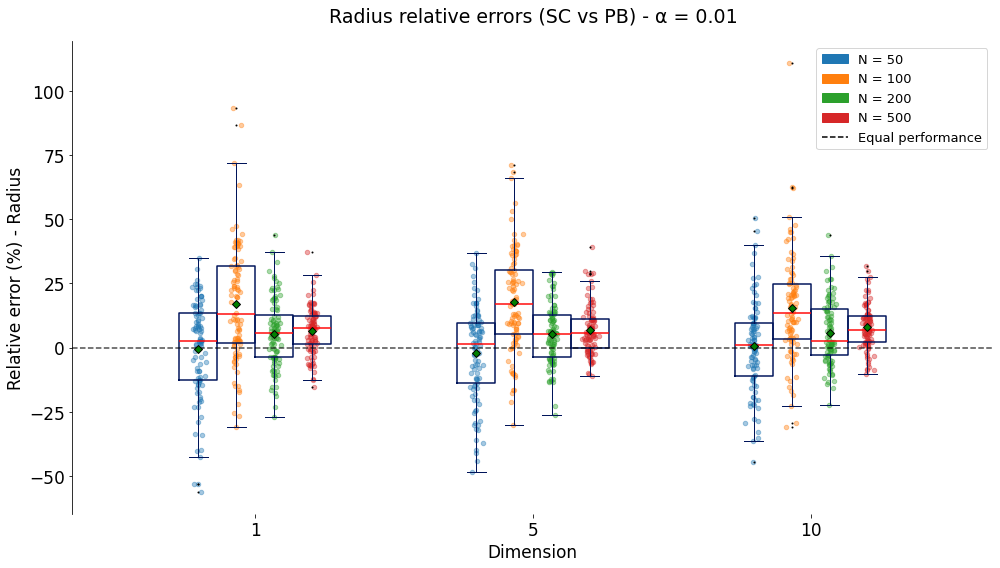

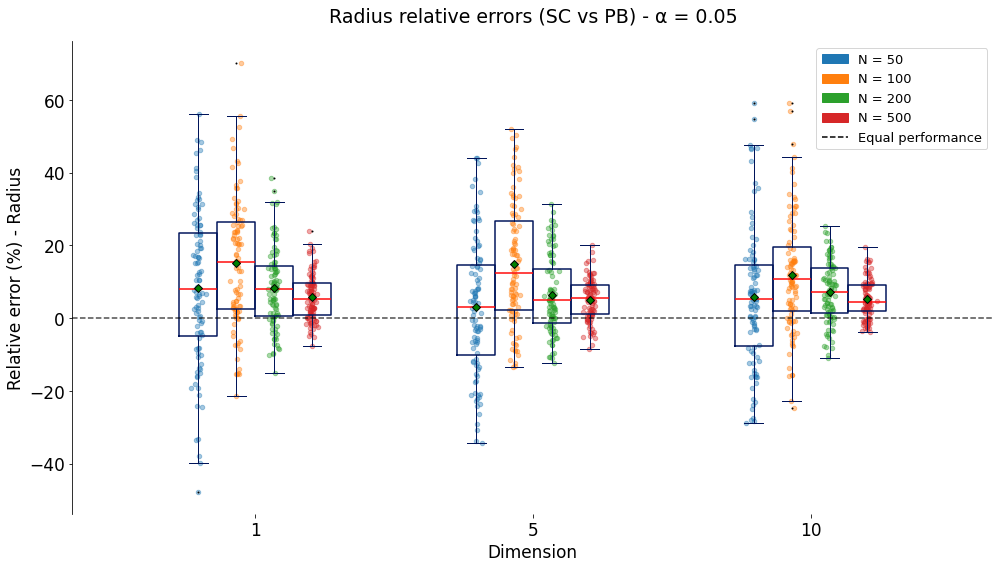

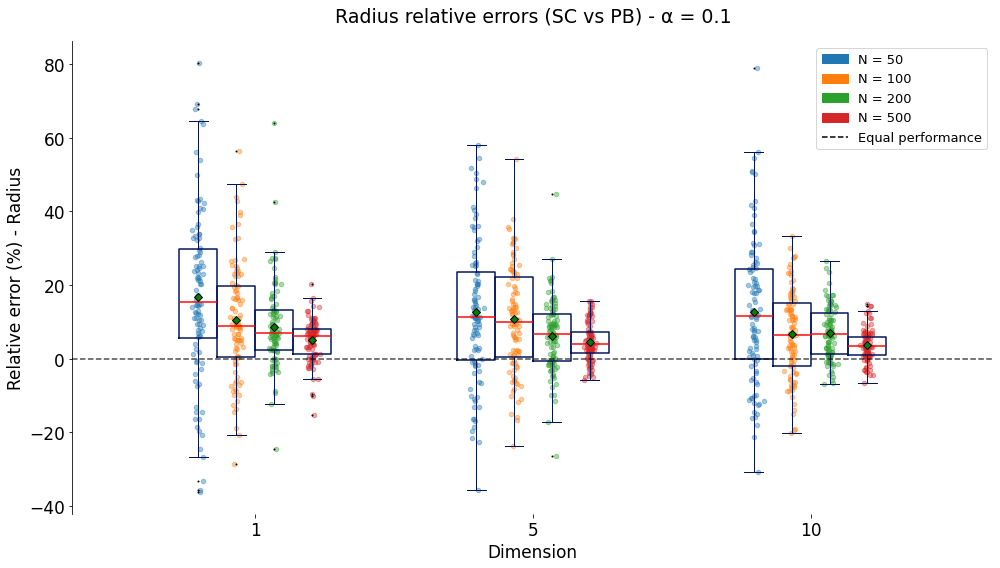

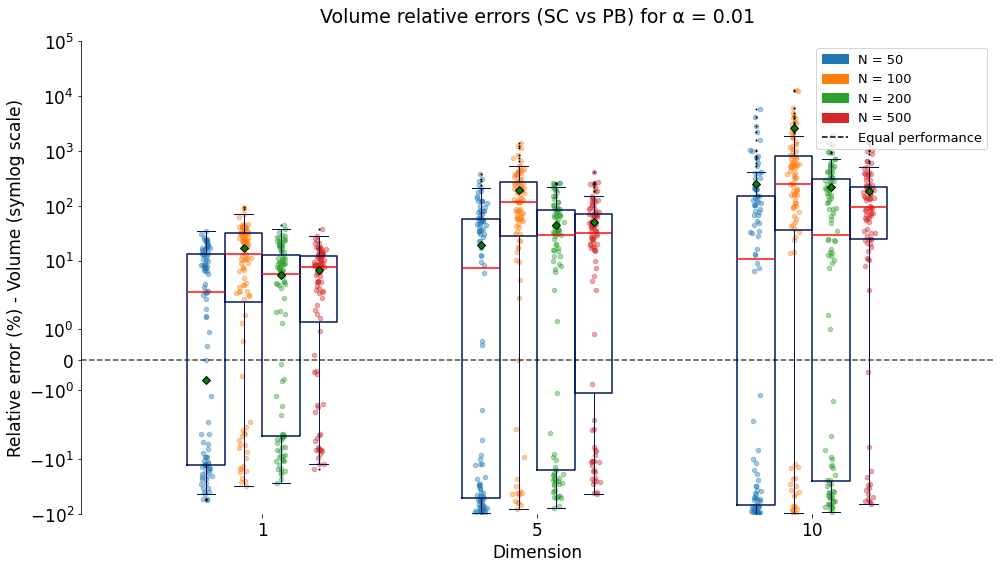

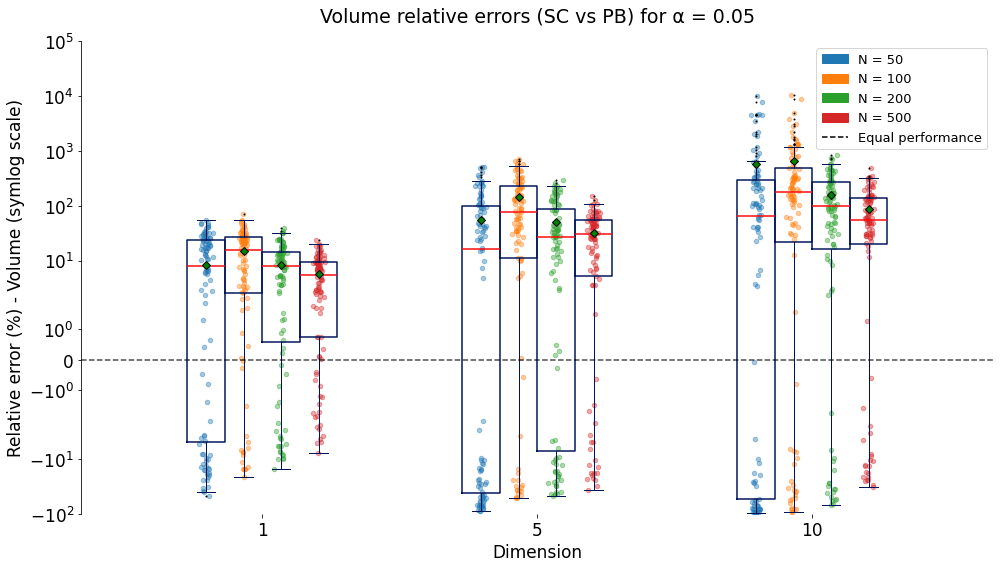

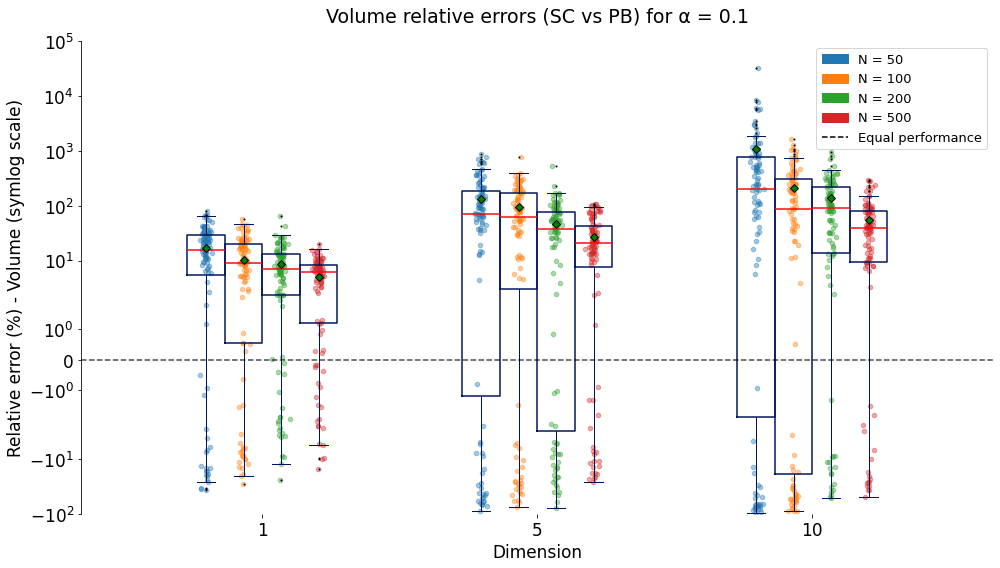

In [ ]:
def ratio_compare_volume_dimension(save_path):
    """
    Plot the relative error of Split-Conformal to Prediction Ball volumes across different dimensions and N values.
    Relative error = (SC_volume - PB_volume) / PB_volume * 100 for matched samples.
    Uses symlog scale for y-axis to handle both positive and negative values.
    """
    
    def compute_relative_error_data(pb_data, sc_data, metric='volume'):
        """Compute relative errors by matching sample_index, dim, and N"""
        error_data = []
        
        for _, pb_row in pb_data.iterrows():
            # Find matching SC row with same sample_index, dim, and N
            sc_match = sc_data[(sc_data['sample_index'] == pb_row['sample_index']) & 
                              (sc_data['dim'] == pb_row['dim']) &
                              (sc_data['N'] == pb_row['N'])]
            
            if not sc_match.empty:
                sc_value = sc_match[metric].iloc[0]
                pb_value = pb_row[metric]
                relative_error = ((sc_value - pb_value) / pb_value * 100) if pb_value != 0 else np.nan
                
                error_data.append({
                    'sample_index': pb_row['sample_index'],
                    'dim': pb_row['dim'],
                    'N': pb_row['N'],
                    'relative_error': relative_error
                })
        
        return pd.DataFrame(error_data)
    
    for pb_data, sc_data, alpha_level in zip(
        [pb_vol_df_alpha_01, pb_vol_df_alpha_05, pb_vol_df_alpha_1], 
        [conf_vol_df_alpha_01, conf_vol_df_alpha_05, conf_vol_df_alpha_1], 
        [0.01, 0.05, 0.1]
    ):
        # Compute relative error data
        error_df = compute_relative_error_data(pb_data, sc_data, metric='volume')
        
        ##### Set style options #####
        boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
        flierprops = dict(marker='o', markersize=1, linestyle='none')
        whiskerprops = dict(color='#00145A')
        capprops = dict(color='#00145A')
        medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

        # Extract unique dimensions and N values
        dims = sorted(error_df['dim'].astype(int).unique())
        n_values = sorted(error_df['N'].unique())
        n_values = [int(n) for n in n_values]

        # Create single plot with all dimensions
        fig, ax = plt.subplots(1, 1, figsize=(14, 8))
        
        # Colors for different N values
        n_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red
        
        # Calculate positions for boxplots
        # For each dimension, we'll have 4 boxplots (one for each N value)
        box_width = 0.15
        positions = []
        labels = []
        
        for d_idx, d in enumerate(dims):
            dim_center = d_idx * (len(n_values) * box_width + 0.15)  # Center position for this dimension
            for n_idx, n_val in enumerate(n_values):
                pos = dim_center + (n_idx - len(n_values)/2 + 0.15) * box_width
                positions.append(pos)
                
                # Filter data for current dimension and N
                dim_n_data = error_df[(error_df['dim'].astype(int) == d) & (error_df['N'] == n_val)]
                error_values = dim_n_data['relative_error'].values
                
                # Create boxplot
                if len(error_values) > 0:
                    bp = ax.boxplot([error_values], positions=[pos], widths=box_width, notch=False,
                                   boxprops=dict(color='#00145A', linewidth=1.5),
                                   whiskerprops=dict(color='#00145A'),
                                   capprops=dict(color='#00145A'),
                                   flierprops=dict(marker='o', markersize=1, linestyle='none'),
                                   medianprops=dict(linewidth=1.5, linestyle='-', color='#ff0808'),
                                   showmeans=True, 
                                   meanprops=dict(marker='D', markerfacecolor='green', markeredgecolor='black', markersize=6))
                    
                    # Scatter plot for individual points
                    xs = np.random.normal(pos, 0.01, len(error_values))
                    ax.scatter(xs, error_values, alpha=0.2, color=n_colors[n_idx], s=20)
        
        # Add horizontal line at 0 (equal performance)
        ax.axhline(y=0.0, color='black', linestyle='--', alpha=0.7, label='Equal performance')
        
        # Set x-axis labels for dimensions
        dim_centers = [d_idx * (len(n_values) * box_width + 0.15) for d_idx in range(len(dims))]
        ax.set_xticks(dim_centers)
        ax.set_xticklabels([str(d) for d in dims], fontsize=17)
        
        # Create legend for N values
        legend_handles = [mpatches.Patch(color=n_colors[i], label=f'N = {n_val}') 
                         for i, n_val in enumerate(n_values)]
        legend_handles.append(mlines.Line2D([], [], color='black', linestyle='--', label='Equal performance'))
        ax.legend(handles=legend_handles, loc='upper right', fontsize=13)
        
        sns.despine(ax=ax, bottom=True)  # Remove right and top axis lines
        
        # Use symlog scale for y-axis to handle both positive and negative values
        # The linear threshold determines the range around zero that is linear
        ax.set_yscale('symlog')
        ax.set_ylim(-100, 10**5)
        
        ax.set_ylabel('Relative error (%) - Volume (symlog scale)', fontsize=17)
        ax.set_xlabel('Dimension', fontsize=17)
        ax.tick_params(labelsize=17)
        ax.grid(False)
        
        plt.title(f'Volume relative errors (SC vs PB) for α = {alpha_level}', fontsize=19, pad=20)
        plt.tight_layout()
        filename = os.path.join(save_path, f'relative_error_sc_pb_volume_{str(alpha_level)[2:]}.pdf')
        plt.savefig(filename, bbox_inches='tight', format='pdf', transparent=True)
        plt.show()

# Generate the ratio plots
save_path = os.path.join(os.getcwd())

# Generate plots for Radius ratios
ratio_compare_radius_dimension(save_path)

# Generate plots for volume ratios
ratio_compare_volume_dimension(save_path)

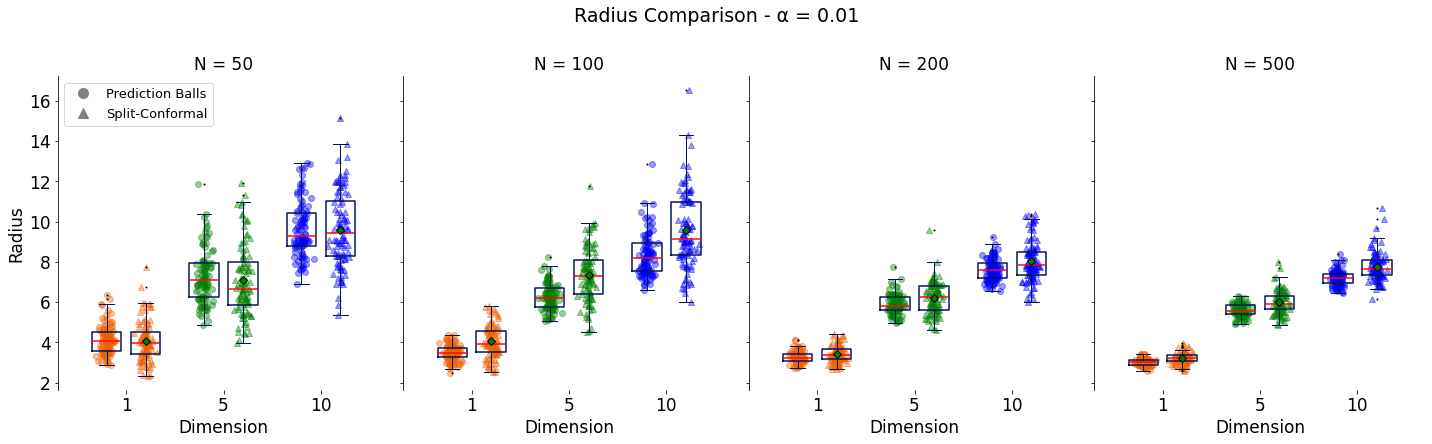

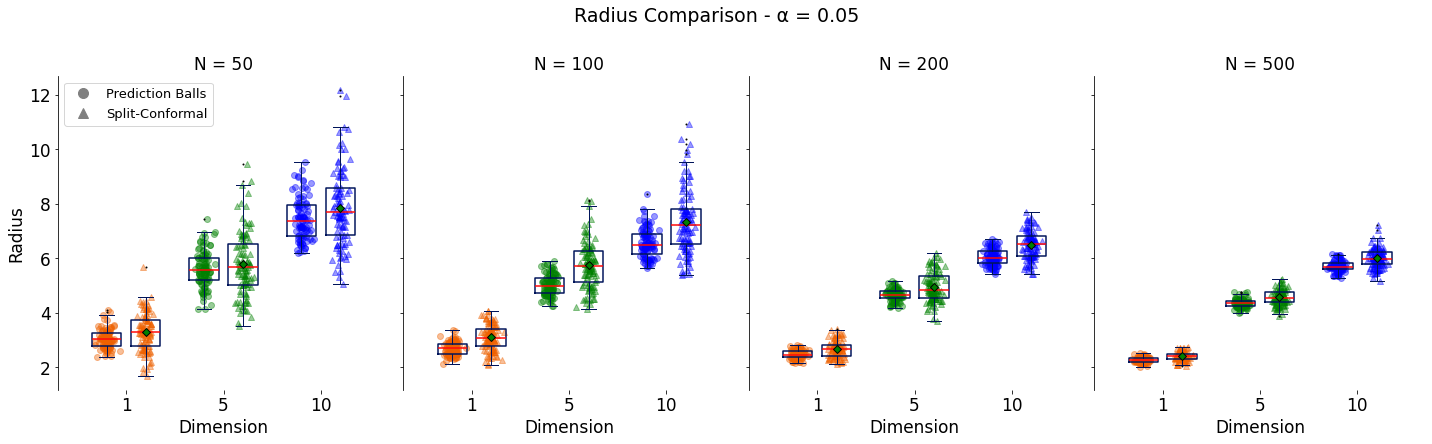

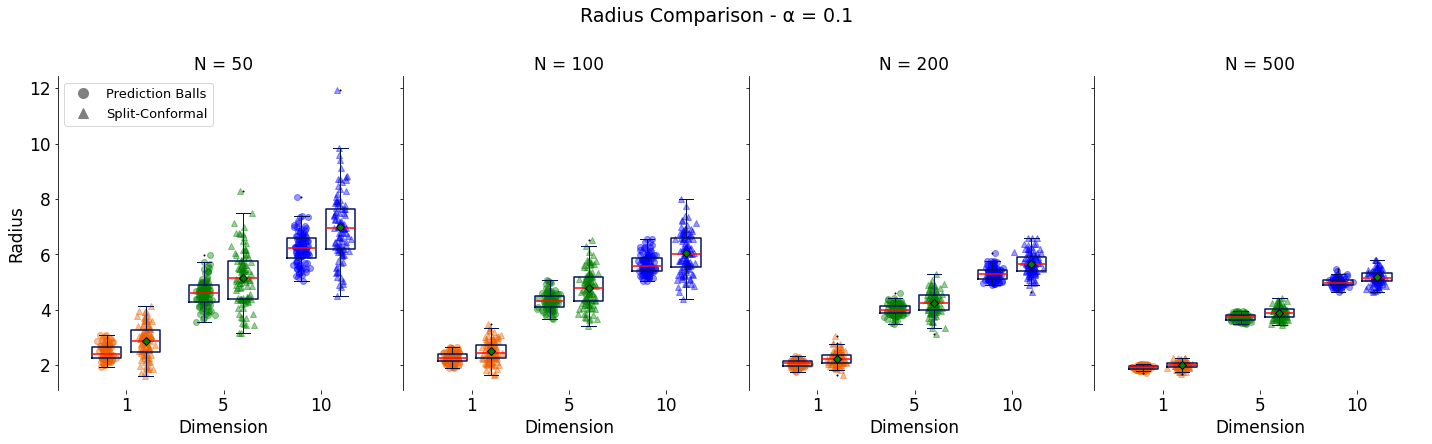

In [ ]:
def radius_compare_pb_sc_dimension(pb_data, sc_data, save_path):
    """
    Compare Prediction Ball (PB) and Split-Conformal (SC) across different dimensions and N values.

    Parameters:
        pb_data (DataFrame): DataFrame containing PB radius.
        sc_data (DataFrame): DataFrame containing SC radius.
        save_path (str): Path to save the generated plots.
    """
    for pb_data, sc_data, alpha_level in zip(
    [pb_radius_df_alpha_01, pb_radius_df_alpha_05, pb_radius_df_alpha_1], 
    [conf_radius_df_alpha_01, conf_radius_df_alpha_05, conf_radius_df_alpha_1], 
    [0.01, 0.05, 0.1] ):
        ##### Set style options #####
        boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
        flierprops = dict(marker='o', markersize=1, linestyle='none')
        whiskerprops = dict(color='#00145A')
        capprops = dict(color='#00145A')
        medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

        # Extract unique dimensions and N values
        dims = sorted(pb_data['dim'].astype(int).unique())
        n_values = sorted(pb_data['N'].unique())
        n_values =[int(n) for n in n_values]

        # Create subplots for each N value
        fig, axes = plt.subplots(1, len(n_values), figsize=(5*len(n_values), 6), sharey=True)
        if len(n_values) == 1:
            axes = [axes]

        for ax_idx, n_val in enumerate(n_values):
            ax = axes[ax_idx]
            
            # Filter data for current N
            pb_n_data = pb_data[pb_data['N'] == n_val]
            sc_n_data = sc_data[sc_data['N'] == n_val]

            # Prepare boxplot data
            pb_boxplot_data = [pb_n_data[pb_n_data['dim'].astype(int) == d]['radius'].values for d in dims]
            sc_boxplot_data = [sc_n_data[sc_n_data['dim'].astype(int) == d]['radius'].values for d in dims]
            
            # Set positions for PB and SC boxplots
            positions_pb = np.array(range(len(dims))) - 0.2
            positions_sc = np.array(range(len(dims))) + 0.2

            # Boxplots for PB and SC
            ax.boxplot(pb_boxplot_data, positions=positions_pb, widths=0.3, notch=False, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, 
                    flierprops=flierprops, medianprops=medianprops, showmeans=False)
            ax.boxplot(sc_boxplot_data, positions=positions_sc, widths=0.3, notch=False, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, 
                    flierprops=flierprops, medianprops=medianprops, showmeans = True, meanprops=dict(marker='D', markerfacecolor='green', markeredgecolor='black', markersize=6))

            # Scatter plot for individual points
            palette = ['#ee6100', 'g', 'b']  # Colors for each dimension

            for i, d in enumerate(dims):
                if len(pb_boxplot_data[i]) > 0:
                    xs_pb = np.random.normal(positions_pb[i], 0.04, len(pb_boxplot_data[i]))
                    ax.scatter(xs_pb, pb_boxplot_data[i], alpha=0.2, color=palette[i], 
                              label='Prediction Balls' if i == 0 and ax_idx == 0 else "")
                
                if len(sc_boxplot_data[i]) > 0:
                    xs_sc = np.random.normal(positions_sc[i], 0.04, len(sc_boxplot_data[i]))
                    ax.scatter(xs_sc, sc_boxplot_data[i], alpha=0.2, color=palette[i], marker='^', 
                              label='Split-Conformal' if i == 0 and ax_idx == 0 else "")

            sns.despine(ax=ax, bottom=True)  # Remove right and top axis lines

            ax.set_xticks(range(len(dims)))
            ax.set_xticklabels([str(d) for d in dims], fontsize=17)
            ax.set_title(f'N = {n_val}', fontsize=17)

            if ax_idx == 0:
                ax.set_ylabel('Radius', fontsize=17)
            ax.set_xlabel('Dimension', fontsize=17)
            ax.tick_params(labelsize=17)
            ax.grid(False)

            # Legend only on first subplot
            if ax_idx == 0:
                legend_handles = [
                    mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label='Prediction Balls'),
                    mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label='Split-Conformal')
                ]
                ax.legend(handles=legend_handles, loc='upper left', fontsize=13)

        fig.tight_layout()
        filename = os.path.join(save_path, f'dim_pb_vs_conf_radius_by_N_{str(alpha_level)[2:]}.pdf')
        fig.savefig(filename, bbox_inches='tight', format='pdf', transparent=True)
        plt.show()

# Ensure 'dim' and 'N' are numeric
pb_radius_df['dim'] = pb_radius_df['dim'].astype(int)
pb_radius_df['N'] = pb_radius_df['N'].astype(int)
conf_radius_df['dim'] = conf_radius_df['dim'].astype(int)
conf_radius_df['N'] = conf_radius_df['N'].astype(int)
save_path = os.path.join(os.getcwd())
# Generate plots for radius
radius_compare_pb_sc_dimension(pb_radius_df, conf_radius_df, save_path=save_path)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/Diego/Desktop/Codigo/minimal_pyfrechet/min_pyfrechet/simulations_euc/simulations_euc/dim_pb_vs_conf_volume_by_N_01.pdf'

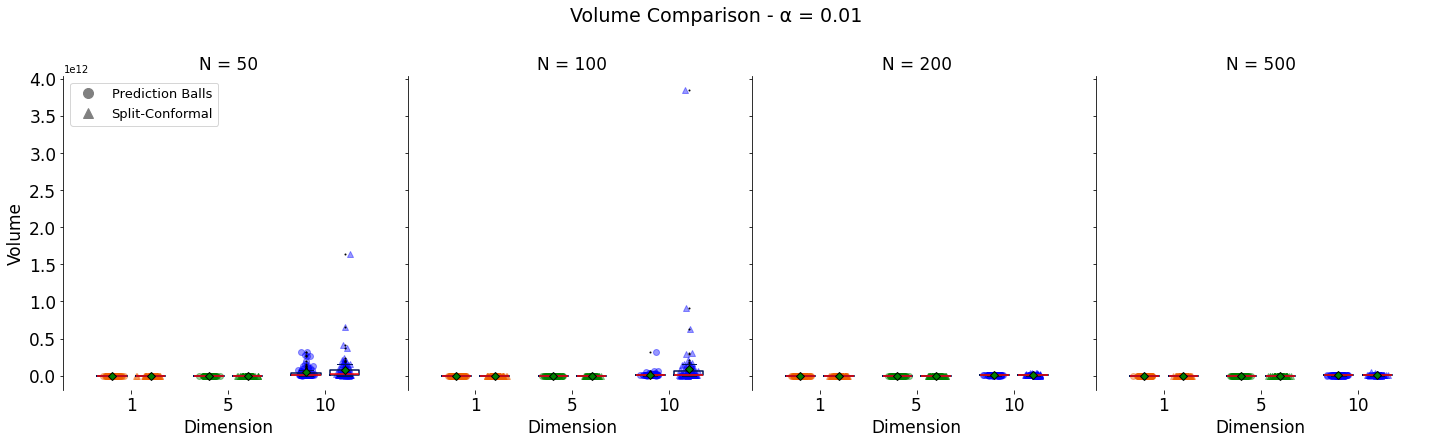

In [ ]:
def volume_compare_pb_sc_dimension(pb_data, sc_data, save_path):
    """
    Compare Prediction Ball (PB) and Split-Conformal (SC) volumes across different dimensions and N values.

    Parameters:
        pb_data (DataFrame): DataFrame containing PB volume.
        sc_data (DataFrame): DataFrame containing SC volume.
        save_path (str): Path to save the generated plots.
    """
    for pb_data, sc_data, alpha_level in zip(
    [pb_vol_df_alpha_01, pb_vol_df_alpha_05, pb_vol_df_alpha_1], 
    [conf_vol_df_alpha_01, conf_vol_df_alpha_05, conf_vol_df_alpha_1], 
    [0.01, 0.05, 0.1] ):
        ##### Set style options #####
        boxprops = dict(linestyle='-', linewidth=1.5, color='#00145A')
        flierprops = dict(marker='o', markersize=1, linestyle='none')
        whiskerprops = dict(color='#00145A')
        capprops = dict(color='#00145A')
        medianprops = dict(linewidth=1.5, linestyle='-', color='#ff0808')

        # Extract unique dimensions and N values
        dims = sorted(pb_data['dim'].astype(int).unique())
        n_values = sorted(pb_data['N'].unique())
        n_values =[int(n) for n in n_values]

        # Create subplots for each N value
        fig, axes = plt.subplots(1, len(n_values), figsize=(5*len(n_values), 6), sharey=True)
        if len(n_values) == 1:
            axes = [axes]

        for ax_idx, n_val in enumerate(n_values):
            ax = axes[ax_idx]
            
            # Filter data for current N
            pb_n_data = pb_data[pb_data['N'] == n_val]
            sc_n_data = sc_data[sc_data['N'] == n_val]

            # Prepare boxplot data
            pb_boxplot_data = [pb_n_data[pb_n_data['dim'].astype(int) == d]['volume'].values for d in dims]
            sc_boxplot_data = [sc_n_data[sc_n_data['dim'].astype(int) == d]['volume'].values for d in dims]
            
            # Set positions for PB and SC boxplots
            positions_pb = np.array(range(len(dims))) - 0.2
            positions_sc = np.array(range(len(dims))) + 0.2

            # Boxplots for PB and SC
            ax.boxplot(pb_boxplot_data, positions=positions_pb, widths=0.3, notch=False, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, 
                    flierprops=flierprops, medianprops=medianprops, showmeans=True, meanprops=dict(marker='D', markerfacecolor='green', markeredgecolor='black', markersize=6))
            ax.boxplot(sc_boxplot_data, positions=positions_sc, widths=0.3, notch=False, 
                    boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops, 
                    flierprops=flierprops, medianprops=medianprops, showmeans=True, meanprops=dict(marker='D', markerfacecolor='green', markeredgecolor='black', markersize=6))

            # Scatter plot for individual points
            palette = ['#ee6100', 'g', 'b']  # Colors for each dimension

            for i, d in enumerate(dims):
                if len(pb_boxplot_data[i]) > 0:
                    xs_pb = np.random.normal(positions_pb[i], 0.04, len(pb_boxplot_data[i]))
                    ax.scatter(xs_pb, pb_boxplot_data[i], alpha=0.2, color=palette[i], 
                              label='Prediction Balls' if i == 0 and ax_idx == 0 else "")
                
                if len(sc_boxplot_data[i]) > 0:
                    xs_sc = np.random.normal(positions_sc[i], 0.04, len(sc_boxplot_data[i]))
                    ax.scatter(xs_sc, sc_boxplot_data[i], alpha=0.2, color=palette[i], marker='^', 
                              label='Split-Conformal' if i == 0 and ax_idx == 0 else "")

            sns.despine(ax=ax, bottom=True)  # Remove right and top axis lines

            ax.set_xticks(range(len(dims)))
            ax.set_xticklabels([str(d) for d in dims], fontsize=17)
            ax.set_title(f'N = {n_val}', fontsize=17)

            if ax_idx == 0:
                ax.set_ylabel('Volume', fontsize=17)
            ax.set_xlabel('Dimension', fontsize=17)
            ax.tick_params(labelsize=17)
            ax.grid(False)

            # Legend only on first subplot
            if ax_idx == 0:
                legend_handles = [
                    mlines.Line2D([], [], color='gray', marker='o', linestyle='none', markersize=10, label='Prediction Balls'),
                    mlines.Line2D([], [], color='gray', marker='^', linestyle='none', markersize=10, label='Split-Conformal')
                ]
                ax.legend(handles=legend_handles, loc='upper left', fontsize=13)

        fig.suptitle(f'Volume Comparison - α = {alpha_level}', fontsize=19, y=1.02)
        fig.tight_layout()
        filename = os.path.join(save_path, f'simulations_euc/dim_pb_vs_conf_volume_by_N_{str(alpha_level)[2:]}.pdf')
        fig.savefig(filename, bbox_inches='tight', format='pdf', transparent=True)
        plt.show()

# Ensure 'dim' and 'N' are numeric
pb_vol_df['dim'] = pb_vol_df['dim'].astype(int)
pb_vol_df['N'] = pb_vol_df['N'].astype(int)
conf_vol_df['dim'] = conf_vol_df['dim'].astype(int)
conf_vol_df['N'] = conf_vol_df['N'].astype(int)
save_path = os.path.join(os.getcwd())
# Generate plots for volume
volume_compare_pb_sc_dimension(pb_vol_df, conf_vol_df, save_path=save_path)

In [121]:
import numpy as np
import pandas as pd

# Assume pb_df and conf_df are DataFrames obtained from pb_all_results() and conf_all_results()
def expand_dataframe(df):
    """ Expand DataFrame by unpacking radius and volume lists into separate rows. """
    expanded_data = []
    significance_levels = ['0.01', '0.05', '0.1']
    
    for _, row in df.iterrows():
        for i, alpha in enumerate(significance_levels):
            expanded_data.append({
                'method': row['method'],
                'dim': row['dim'],
                'N': row['N'],  # Include N parameter
                'significance': alpha,
                'radius': row['radius'][i],  # Extract the i-th element from the list
                'volume': row['volume'][i]   # Extract the i-th element from the list
            })
    
    return pd.DataFrame(expanded_data)

# Load and process data
pb_df = pb_all_results()  # Prediction Balls
conf_df = conf_all_results()  # Split-Conformal

# Add method labels
pb_df['method'] = 'Prediction Balls'
conf_df['method'] = 'Split-Conformal'

# Expand data
pb_df = expand_dataframe(pb_df)
conf_df = expand_dataframe(conf_df)

# Combine both methods into a single dataframe
full_df = pd.concat([pb_df, conf_df], ignore_index=True)

# Compute statistics grouped by method, dim, N, and significance
stats_df = full_df.groupby(['method', 'dim', 'N', 'significance']).agg(
    radius_mean=('radius', 'mean'),
    radius_std=('radius', 'std'),
    volume_mean=('volume', 'mean'),
    volume_std=('volume', 'std')
).reset_index()

# Function to format numbers in scientific notation if large
def format_number(value):
    return f"{value:.2e}" if abs(value) > 100 else f"{value:.2f}"

# Prepare tables for radius and volume with N grouping
methods = ['Prediction Balls', 'Split-Conformal']
dimensions = ['1', '5', '10']
significance_levels = ['0.01', '0.05', '0.1']
n_values = sorted(stats_df['N'].unique())
n_values =[int(n) for n in n_values]

for n_val in n_values:
    # Filter data for current N
    n_stats_df = stats_df[stats_df['N'] == n_val]
    
    # Radius Table for N=n_val
    radius_rows = []
    for dim in dimensions:
        row = []
        for method in methods:
            for alpha in significance_levels:
                subset = n_stats_df[(n_stats_df['method'] == method) & 
                                  (n_stats_df['dim'] == dim) & 
                                  (n_stats_df['significance'] == alpha)]
                if not subset.empty:
                    mean_radius = subset['radius_mean'].values[0]
                    std_radius = subset['radius_std'].values[0]
                    row.append(f"{format_number(mean_radius)} ({format_number(std_radius)})")
                else:
                    row.append("-")
        radius_rows.append(row)

    radius_col_index = pd.MultiIndex.from_product(
        [methods, significance_levels], names=["Method", "Significance Level"])
    radius_df = pd.DataFrame(radius_rows, index=dimensions, columns=radius_col_index)
    radius_df.index.name = "Dimension"

    # Volume Table for N=n_val
    volume_rows = []
    for dim in dimensions:
        row = []
        for method in methods:
            for alpha in significance_levels:
                subset = n_stats_df[(n_stats_df['method'] == method) & 
                                  (n_stats_df['dim'] == dim) & 
                                  (n_stats_df['significance'] == alpha)]
                if not subset.empty:
                    mean_volume = subset['volume_mean'].values[0]
                    std_volume = subset['volume_std'].values[0]
                    row.append(f"{format_number(mean_volume)} ({format_number(std_volume)})")
                else:
                    row.append("-")
        volume_rows.append(row)

    volume_col_index = pd.MultiIndex.from_product(
        [methods, significance_levels], names=["Method", "Significance Level"])
    volume_df = pd.DataFrame(volume_rows, index=dimensions, columns=volume_col_index)
    volume_df.index.name = "Dimension"

    # Convert to LaTeX
    radius_latex = radius_df.to_latex(index=True, escape=False, multirow=True, multicolumn=True, 
                                      multicolumn_format='c',
                                      caption=f"Impact of Dimension on Prediction Ball and SC Radii (N={n_val})", 
                                      label=f"tab:radius_dimension_N{n_val}")

    volume_latex = volume_df.to_latex(index=True, escape=False, multirow=True, multicolumn=True, 
                                      multicolumn_format='c', 
                                      caption=f"Impact of Dimension on Prediction Ball and SC Volumes (N={n_val})", 
                                      label=f"tab:volume_dimension_N{n_val}")

    print(f"\n=== Tables for N = {n_val} ===")
    print("\nRadius Table:")
    print(radius_latex)
    print("\nVolume Table:")
    print(volume_latex)


=== Tables for N = 50 ===

Radius Table:
\begin{table}
\caption{Impact of Dimension on Prediction Ball and SC Radii (N=50)}
\label{tab:radius_dimension_N50}
\begin{tabular}{lllllll}
\toprule
Method & \multicolumn{3}{c}{Prediction Balls} & \multicolumn{3}{c}{Split-Conformal} \\
Significance Level & 0.01 & 0.05 & 0.1 & 0.01 & 0.05 & 0.1 \\
Dimension &  &  &  &  &  &  \\
\midrule
1 & 4.13 (0.72) & 3.06 (0.34) & 2.46 (0.27) & 4.07 (0.99) & 3.31 (0.70) & 2.86 (0.58) \\
5 & 7.26 (1.33) & 5.62 (0.66) & 4.59 (0.49) & 7.07 (1.77) & 5.78 (1.20) & 5.16 (0.98) \\
10 & 9.62 (1.38) & 7.46 (0.77) & 6.22 (0.57) & 9.60 (1.88) & 7.85 (1.41) & 6.98 (1.22) \\
\bottomrule
\end{tabular}
\end{table}


Volume Table:
\begin{table}
\caption{Impact of Dimension on Prediction Ball and SC Volumes (N=50)}
\label{tab:volume_dimension_N50}
\begin{tabular}{lllllll}
\toprule
Method & \multicolumn{3}{c}{Prediction Balls} & \multicolumn{3}{c}{Split-Conformal} \\
Significance Level & 0.01 & 0.05 & 0.1 & 0.01 & 0.05 & 0.1